In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
import os
import matplotlib.pyplot as plt

In [2]:
def get_object_with_tag(text):
    objects_list = []
    temp = text
    while True:
        pos = temp.find('commonpostingitemtag=""')
        if pos<0: break
        temp2 = temp[pos:]
        pos = temp2.find('</li>')
        if pos<0: break
        obj = temp2[:pos+26]
        temp = temp2[pos+26:]
        objects_list.append(obj)
    return objects_list

def get_tag_from_object(x):
    pos = x.find('type="button">')
    temp = x[pos:]
    pos = temp.find('>')
    temp2 = temp[pos+1:]
    pos = temp2.find('<')
    temp = temp2[:pos]
    temp2 = temp.strip()
    return temp2.lower()

def get_tags_from_objects(obj_list):
    new_list = []
    for x in obj_list:
        tag = get_tag_from_object(x)
        new_list.append(tag)
    return new_list

In [3]:
def get_skills_from_url(url):
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'html5lib')
    
    web_side_text = str(soup)
    must_have_pos = web_side_text.find('Wymagania obowiązkowe')
    nice_to_have_pos = web_side_text.find('Mile widziane')
    must_have_text = web_side_text[must_have_pos:nice_to_have_pos]
    nice_to_have_text = web_side_text[nice_to_have_pos:]
    
    must_have_objects_list = get_object_with_tag(must_have_text)
    nice_to_have_objects_list = get_object_with_tag(nice_to_have_text)
    
    return get_tags_from_objects(must_have_objects_list), get_tags_from_objects(nice_to_have_objects_list)

In [4]:
def get_links_from_webside(key):
    url = 'https://nofluffjobs.com/pl/' + key + '?page='
    i = 1
    new_links_number = 9999
    list_of_links = []

    while new_links_number>0:
        url2 = url + str(i)

        html = requests.get(url2).text
        soup = BeautifulSoup(html, 'html5lib')
        a_tag = soup('a')

        new_list_of_links = []
        for x in a_tag:
            temp = str(x)
            pos = temp.find('/pl/job')
            if pos == -1: continue
            temp2 = temp[pos:]
            pos = temp2.find('"')
            temp = temp2[:pos]
            temp2 = 'https://nofluffjobs.com' + temp
            new_list_of_links.append(temp2)
        new_links_number = len(new_list_of_links)
        list_of_links.extend(new_list_of_links)
        i += 1
    return list_of_links

In [5]:
def filter_links(links_list, filter_list):
    new_links_list = []
    for x in links_list:
        for y in filter_list:
            pos = x.find(y)
            if pos>=0:
                new_links_list.append(x)
                break
    return new_links_list

In [6]:
def get_skills_from_webside(filter_list=[], key='machine learning'):
    list_of_links = get_links_from_webside(key)
    
    if len(filter_list)>0:
        list_filtered = filter_links(list_of_links, filter_list)
    else:
        list_filtered = list_of_links
    
    must_have = {}
    nice_to_have = {}
    for link in list_filtered:
        m,n = get_skills_from_url(link)
        must_have[link] = m
        nice_to_have[link] = n
    return must_have, nice_to_have

In [7]:
filter_list = [] # additional keys for search, searched advertisement must match main key
# and at least one key from filter if filter not empty
key = 'machine learning' # main key for searching advertisements

must_skills, nice_skills = get_skills_from_webside(filter_list, key)

In [8]:
key2 = key.replace(' ','_')
must_filepath = 'df_must_'+key2+'.csv'

df_must = pd.DataFrame()

for link, values in must_skills.items():
    for x in values:
        df_must.loc[link,x]=1

df_must.to_csv(must_filepath, index_label='link')

In [9]:
key2 = key.replace(' ','_')
nice_filepath = 'df_nice_'+key2+'.csv'

df_nice = pd.DataFrame()
    
for link, values in nice_skills.items():
    for x in values:
        df_nice.loc[link,x]=1

df_nice.to_csv(nice_filepath, index_label='link')

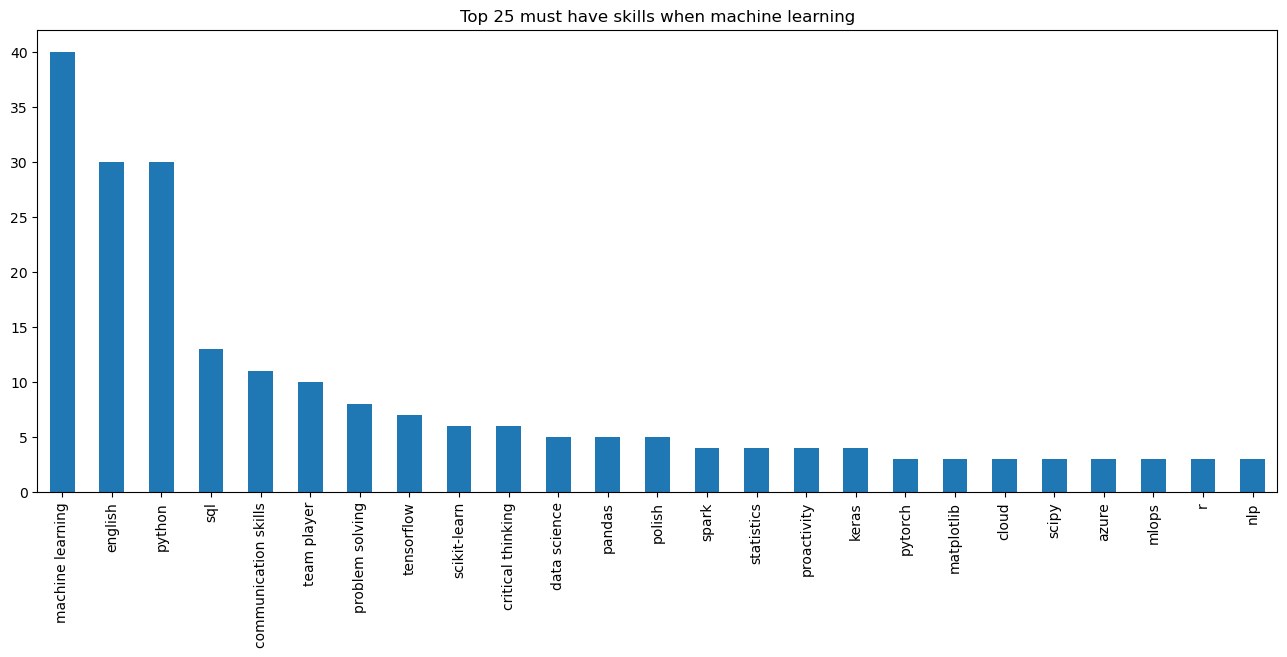

In [10]:
a = df_must.sum(axis=0).sort_values(ascending=False)
a.iloc[:25].plot(kind='bar', figsize=(16,6), title='Top 25 must have skills when '+key);
plt.show();

In [11]:
a.head(20)

machine learning        40.0
english                 30.0
python                  30.0
sql                     13.0
communication skills    11.0
team player             10.0
problem solving          8.0
tensorflow               7.0
scikit-learn             6.0
critical thinking        6.0
data science             5.0
pandas                   5.0
polish                   5.0
spark                    4.0
statistics               4.0
proactivity              4.0
keras                    4.0
pytorch                  3.0
matplotlib               3.0
cloud                    3.0
dtype: float64

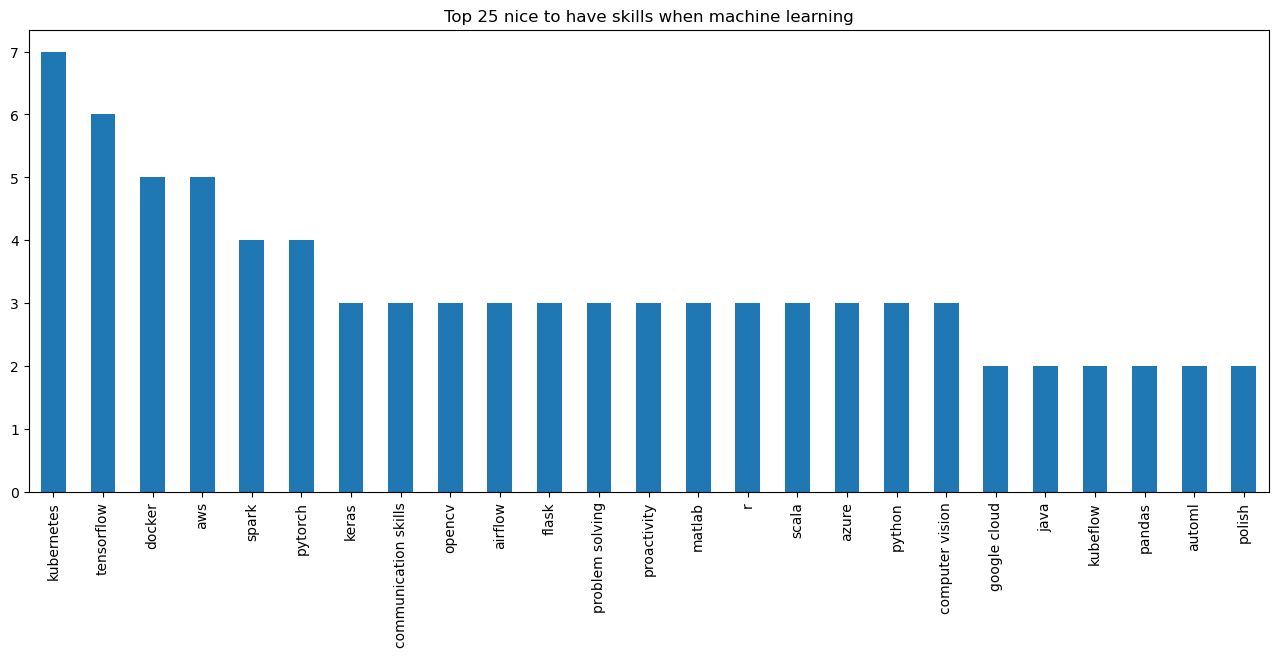

In [12]:
b = df_nice.sum(axis=0).sort_values(ascending=False)
b.iloc[:25].plot(kind='bar', figsize=(16,6), title='Top 25 nice to have skills when '+key);
plt.show();

In [13]:
b.head(20)

kubernetes              7.0
tensorflow              6.0
docker                  5.0
aws                     5.0
spark                   4.0
pytorch                 4.0
keras                   3.0
communication skills    3.0
opencv                  3.0
airflow                 3.0
flask                   3.0
problem solving         3.0
proactivity             3.0
matlab                  3.0
r                       3.0
scala                   3.0
azure                   3.0
python                  3.0
computer vision         3.0
google cloud            2.0
dtype: float64

In [14]:
len(df_must)

40

In [15]:
for x in df_must.index:
#     pos = x.find('junior')
    pos = x.find('remote')
    if (pos>=0):# and (pos2>=0):
        print(x)

https://nofluffjobs.com/pl/job/senior-data-scientist-objectivity-remote-sshyneul
https://nofluffjobs.com/pl/job/data-architect-objectivity-remote-c1jn3tzr
https://nofluffjobs.com/pl/job/staff-software-engineer-machine-learning-affirm-remote-bisgnuwj
https://nofluffjobs.com/pl/job/remote-data-scientist-nlp-lingaro-1xtcj5kz
https://nofluffjobs.com/pl/job/sr-software-engineer-machine-learning-affirm-remote-y1dlzhy2
https://nofluffjobs.com/pl/job/senior-ai-engineer-link-group-remote-syih1csv
https://nofluffjobs.com/pl/job/senior-data-scientist-hubquest-remote-pvc8kaiu
https://nofluffjobs.com/pl/job/machine-learning-developer-link-group-remote-qtg3110h
https://nofluffjobs.com/pl/job/rpa-lab-deloitte-advisory-remote-9w2e6i3w
https://nofluffjobs.com/pl/job/ai-lab-deloitte-advisory-remote-afmbfx8d
https://nofluffjobs.com/pl/job/computer-vision-data-scientist-secret-sauce-partners-remote-chyicyyr
https://nofluffjobs.com/pl/job/mlops-engineer-mx-labs-remote-6ytwqgpf
https://nofluffjobs.com/pl/jo